### Chapter 03. 타이타닉 데이터 분석

In [32]:
import pandas as pd

titanic = pd.read_csv('Dataset/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
titanic.shape

(891, 12)

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


    결측값을 포함하고 있다.

In [35]:
titanic.describe() # 기초 통계랑 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


✅ **value_counts()**
- Series에 있는 값들의 개수를 세어서 반환해주는 함수

In [36]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [37]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

    Cabin 컬럼에 결측치가 너무 많아서 해당 컬럼을 drop 할 예정이다.

✅ Pandas에서 `axis`의 의미

| `axis` 값 | 기준 방향     | 의미                  |
|-----------|----------------|-----------------------|
| `axis=0`  | **행 (index)** 기준 | 아래 방향으로 동작 → **행 단위 작업** |
| `axis=1`  | **열 (column)** 기준 | 옆 방향으로 동작 → **열 단위 작업** |


In [38]:
#titanic = titanic.drop(['Cabin'], axis=1, inplace=False)

titanic.drop(['Cabin'], axis=1, inplace=True) # inplace를 넣으면 대입연산자 없이 저장 가능
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


✅ **unique()**

    중복 없이 유일한 값만 출력해주는 함수.

In [39]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [40]:
titanic["Embarked"].value_counts() # 최빈값을 확인하기

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

    Embarked 컬럼에는 결측치가 많지 않기 때문에 최빈값을 확인한 후 그 값으로 대체해줬다.

In [41]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

    Age 컬럼은 없애기에는 애매한 수라 전체 나이의 평균을 계산하여 평균값으로 대체해줬다.

In [56]:
avg = titanic["Age"].mean()
titanic['Age'] = titanic['Age'].fillna(avg)
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

> 생존에 영향을 준 컬럼을 분석해보기

In [57]:
# 생존여부에 관련이 없는 컬럼은 drop 시키기
titanic.drop(['Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
titanic.head(3)

KeyError: "['Name', 'Ticket', 'Embarked'] not found in axis"

In [58]:
titanic.groupby(['Pclass', 'Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.141405  0.553191  0.457447   
       male     455.729508  0.368852  39.287717  0.311475  0.278689   
2      female   443.105263  0.921053  28.748661  0.486842  0.605263   
       male     447.962963  0.157407  30.653908  0.342593  0.222222   
3      female   399.729167  0.500000  24.068493  0.895833  0.798611   
       male     455.515850  0.135447  27.372153  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

> Seaborn 라이브러리를 활용한 시각화

    생존여부에 영향을 준 첫 번째 요인으로 Pclass 컬럼을 지정.

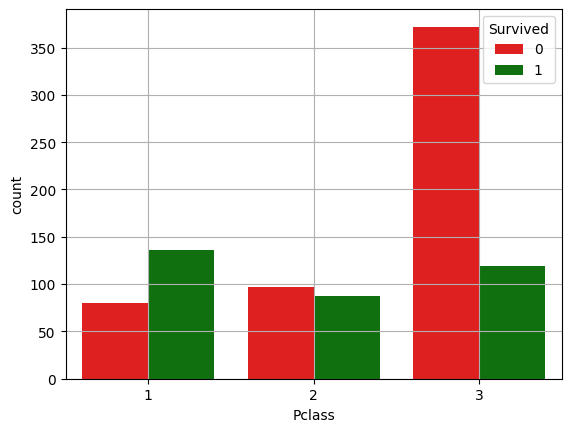

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=titanic,
              x='Pclass',
              hue='Survived',
              palette=['red', 'green'],
              stat='count') # statistics: n. 통계(학)

plt.grid()
plt.show()

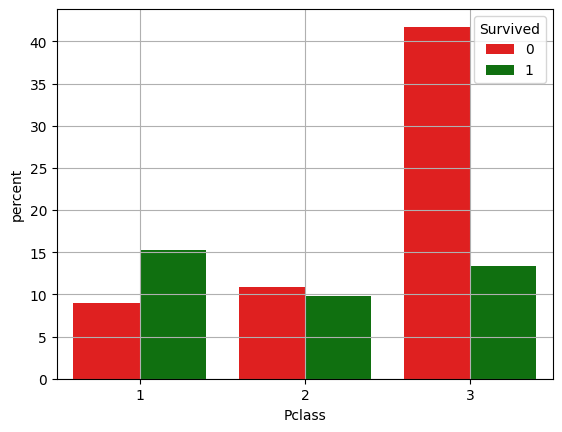

In [60]:
sns.countplot(data=titanic,
              x='Pclass',
              hue='Survived',
              palette=['red', 'green'],
              stat='percent') # statistics: n. 통계(학)

plt.grid()
plt.show()

In [61]:
titanic.drop(['Sex'], axis=1, inplace=True)
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


✅ **correlation analysis (상관 분석)**

In [62]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


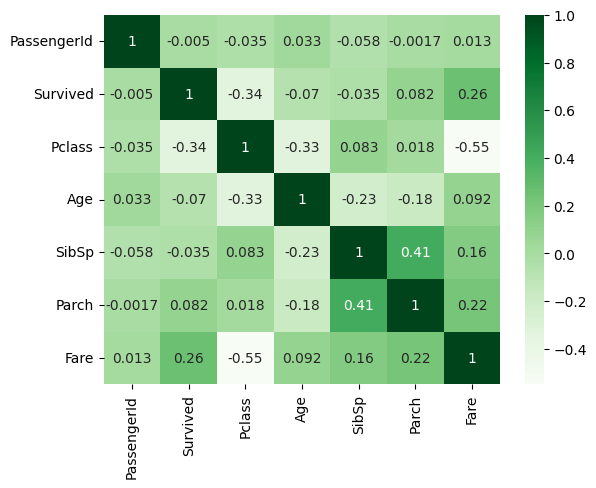

In [73]:
sns.heatmap(data=titanic.corr(), annot=True, cmap='Greens') # annotation: n. 주석

plt.show()